In [56]:
import numpy as np
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_classification

In [5]:
tp = make_classification(n_features=10)

In [6]:
len(tp)

2

In [9]:
X = tp[0]

In [10]:
Y = tp[1]

In [17]:
X = X.round(2)

In [18]:
X.shape

(100, 10)

In [19]:
df = pd.DataFrame(X, columns=list("abcdefghij"))

In [21]:
df['T'] = Y

In [22]:
df

,a,b,c,d,e,f,g,h,i,j,T
0,-1.14,1.10,1.91,-1.38,0.23,-0.59,0.88,1.63,-0.28,-0.26,0
1,-0.75,0.91,-2.40,-0.67,0.11,-0.18,-0.94,-2.00,0.31,0.16,1
2,0.62,-0.11,0.76,0.61,0.06,0.25,-1.01,1.21,1.46,1.03,1
3,0.73,-1.55,1.17,2.56,1.12,-1.11,0.00,-0.58,-2.11,-1.39,0
4,-1.00,1.25,1.56,0.17,1.14,-0.29,-0.72,-0.65,0.53,0.29,1
...,...,...,...,...,...,...,...,...,...,...,...
95,-1.29,0.74,-0.44,-1.77,1.44,1.88,0.74,-0.57,-1.67,-1.21,0
96,1.81,-1.51,-1.98,-0.53,0.45,1.15,0.94,-2.12,1.08,0.85,1
97,-0.96,1.03,1.54,0.65,1.29,-0.02,0.30,-0.08,0.06,-0.02,1
98,-0.54,1.03,0.96,1.19,-1.43,-0.41,0.35,1.05,1.21,0.79,1


<AxesSubplot:>

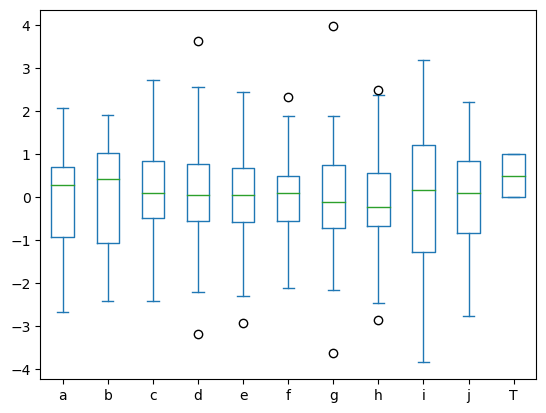

In [23]:
df.plot.box()

In [26]:
df.describe()

,a,b,c,d,e,f,g,h,i,j,T
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,-0.029300,0.029600,0.141400,0.149300,-0.015500,0.072000,-0.019900,-0.083200,-0.00490,-0.005100,0.500000
std,1.119262,1.112836,1.070343,1.104737,1.003985,0.918274,1.037799,1.079287,1.58309,1.103231,0.502519
min,-2.670000,-2.410000,-2.400000,-3.180000,-2.920000,-2.110000,-3.630000,-2.860000,-3.84000,-2.760000,0.000000
25%,-0.932500,-1.062500,-0.490000,-0.552500,-0.572500,-0.550000,-0.705000,-0.660000,-1.28250,-0.830000,0.000000
50%,0.285000,0.425000,0.110000,0.055000,0.055000,0.100000,-0.115000,-0.225000,0.16000,0.105000,0.500000
75%,0.692500,1.030000,0.840000,0.780000,0.690000,0.497500,0.757500,0.567500,1.21500,0.835000,1.000000
max,2.080000,1.910000,2.720000,3.640000,2.440000,2.320000,3.970000,2.490000,3.18000,2.220000,1.000000


In [27]:
q1 = -0.5525
q3 = 0.78

In [28]:
eiqr = 1.5*(q3-q1)

In [30]:
lb = q1 - eiqr
ub = q3 + eiqr

In [33]:
print(lb, ub)

-2.55125 2.77875


<AxesSubplot:>

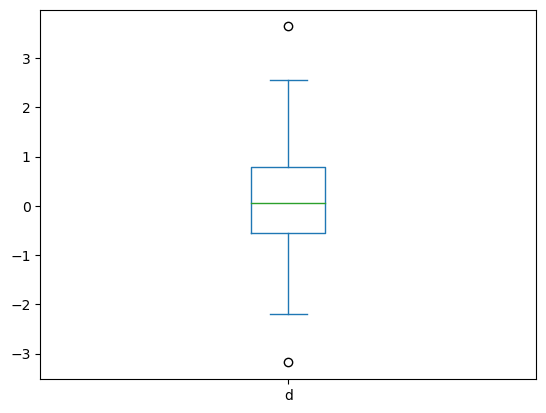

In [34]:
df['d'].plot.box()

In [37]:
df['d'][(df['d']>ub) | (df['d']<lb)]

52   -3.18
82    3.64
Name: d, dtype: float64

In [41]:
df.loc[(df['d']>ub) | (df['d']<lb), 'd'] = df['d'].median()

In [43]:
df[(df['d']>ub) | (df['d']<lb)]

,a,b,c,d,e,f,g,h,i,j,T


<AxesSubplot:>

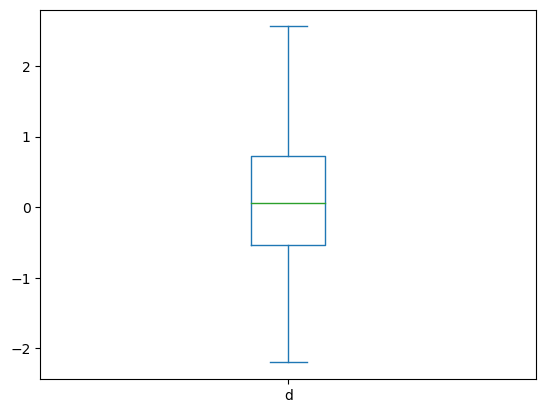

In [44]:
df['d'].plot.box()

In [45]:
df.skew()

a   -0.325240
b   -0.211168
c   -0.082682
d    0.216216
e   -0.284938
f    0.178578
g    0.199319
h    0.168812
i   -0.243807
j   -0.268168
T    0.000000
dtype: float64

In [46]:
df.kurt()

a   -0.684530
b   -1.421989
c   -0.037486
d   -0.128900
e    0.275194
f   -0.095943
g    2.156255
h    0.156503
i   -0.484061
j   -0.346596
T   -2.041237
dtype: float64

In [47]:
df.kurtosis()

a   -0.684530
b   -1.421989
c   -0.037486
d   -0.128900
e    0.275194
f   -0.095943
g    2.156255
h    0.156503
i   -0.484061
j   -0.346596
T   -2.041237
dtype: float64

<AxesSubplot:ylabel='Density'>

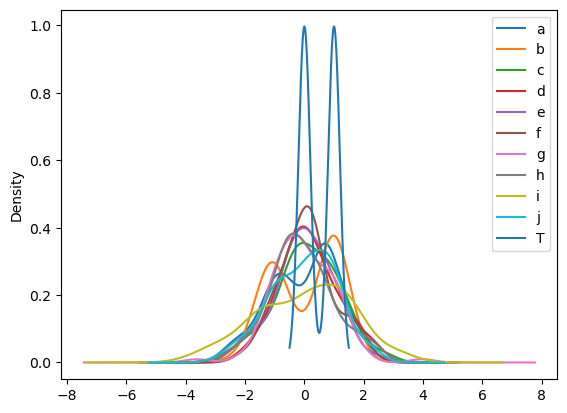

In [50]:
df.plot.density()

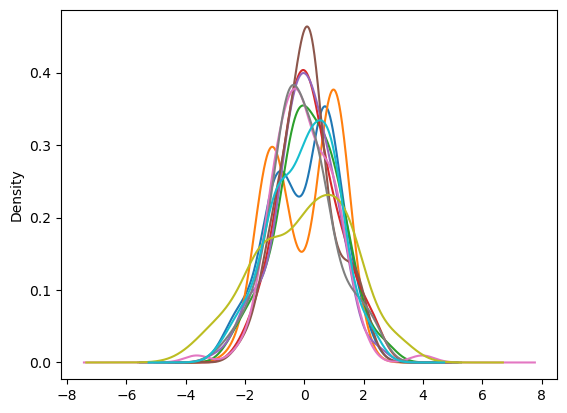

In [55]:
for k in df.columns[:-1]:
    df[k].plot.density()

<AxesSubplot:ylabel='Density'>

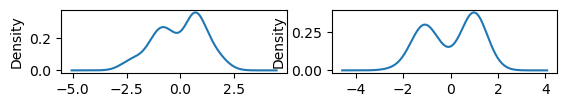

In [61]:
plt.subplot(5,2,1)
df[k].plot.density()

plt.subplot(5,2,2)
df[k].plot.density()

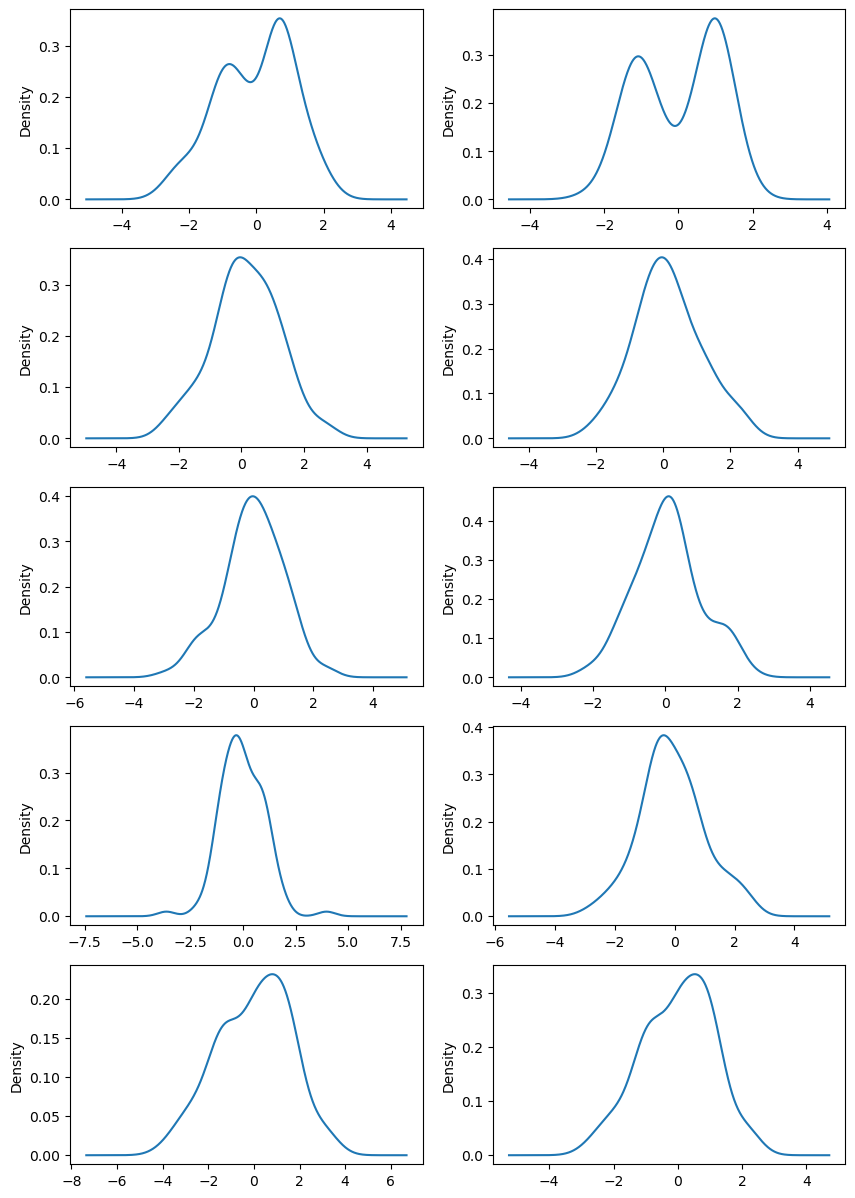

In [67]:
plt.figure(figsize=(10,15))
c=0
for k in df.columns[:-1]:
    c=c+1
    plt.subplot(5,2,c)
    df[k].plot.density()

In [68]:
df.kurt()

a   -0.684530
b   -1.421989
c   -0.037486
d   -0.128900
e    0.275194
f   -0.095943
g    2.156255
h    0.156503
i   -0.484061
j   -0.346596
T   -2.041237
dtype: float64

In [74]:
from sklearn.preprocessing import PowerTransformer

In [75]:
pt = PowerTransformer(method='yeo-johnson')

In [79]:
trans = pt.fit_transform(df[['g']])

In [83]:
pd.DataFrame(trans).kurt()

0    2.103103
dtype: float64

In [89]:
from statsmodels.formula.api import glm, ols

In [90]:
mod = ols('T~a+b+c+d+e+f+g+h+i+j', df).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      T   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     9.138
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           3.25e-10
Time:                        17:44:37   Log-Likelihood:                -37.256
No. Observations:                 100   AIC:                             96.51
Df Residuals:                      89   BIC:                             125.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4975      0.039     12.844      0.000       0.421       0.574
a             -1.1554     10.268     -0.113      0.911     -21.558      19.247
b             -2.0428      9.707     -0.210      0.834     -21.330      17.244
c              0.0265      0.037      0.718      0.475      -0.047       0.100
d             -0.0044      0.039     -0.111      0.912      -0.083       0.074
e              0.0209      0.038      0.551      0.583      -0.054       0.096
f              0.0049      0.043      0.115      0.909      -0.080       0.090
g             -0.0166      0.038     -0.437      0.663      -0.092       0.059
h             -0.0317      0.037     -0.863      0.390      -0.105       0.041
i             11.6793      7.691      1.519      0.132      -3.602      26.961
j            -15.7348     10.125     -1.554      0.124     -35.852       4.383
==============================================================================
Omnibus:                        5.415   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                5.531
Skew:                          -0.559   Prob(JB):                       0.0630
Kurtosis:                       2.721   Cond. No.                         788.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
from sklearn.preprocessing import Binarizer

In [92]:
bn = Binarizer(threshold=30)

In [94]:
bn.fit_transform([[10,20,30,40,50]])

array([[0, 0, 0, 1, 1]])

In [109]:
df.loc[:, 'a'] = np.random.choice(['r','b','g'], 100)

In [111]:
df

,a,b,c,d,e,f,g,h,i,j,T
0,r,1.10,1.91,-1.38,0.23,-0.59,0.88,1.63,-0.28,-0.26,0
1,r,0.91,-2.40,-0.67,0.11,-0.18,-0.94,-2.00,0.31,0.16,1
2,r,-0.11,0.76,0.61,0.06,0.25,-1.01,1.21,1.46,1.03,1
3,g,-1.55,1.17,2.56,1.12,-1.11,0.00,-0.58,-2.11,-1.39,0
4,r,1.25,1.56,0.17,1.14,-0.29,-0.72,-0.65,0.53,0.29,1
...,...,...,...,...,...,...,...,...,...,...,...
95,r,0.74,-0.44,-1.77,1.44,1.88,0.74,-0.57,-1.67,-1.21,0
96,b,-1.51,-1.98,-0.53,0.45,1.15,0.94,-2.12,1.08,0.85,1
97,g,1.03,1.54,0.65,1.29,-0.02,0.30,-0.08,0.06,-0.02,1
98,g,1.03,0.96,1.19,-1.43,-0.41,0.35,1.05,1.21,0.79,1


In [112]:
from sklearn.preprocessing import LabelEncoder

In [113]:
lb = LabelEncoder()
lb.fit_transform(df[['a']])

C:\Users\Rooman\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 2, 2, 1, 2, 2, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 2, 0, 0,
       1, 2, 0, 1, 2, 2, 1, 0, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1,
       0, 2, 1, 2, 2, 0, 0, 0, 1, 0, 0, 2, 1, 2, 2, 0, 2, 2, 2, 1, 0, 2,
       1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 1, 2, 2, 2, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 2, 2, 0, 1, 1, 0])

In [114]:
from sklearn.preprocessing import OrdinalEncoder

In [115]:
od = OrdinalEncoder(categories=[['g','r','b']])

In [117]:
od.fit_transform(df[['a']])

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [1.],
       [0.],
       [2.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.],
       [0.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [2.],
       [1.],
       [2.],
       [0.],
       [2.],

In [121]:
from sklearn.preprocessing import OneHotEncoder

In [132]:
on = OneHotEncoder(categories=[['g','r','b']], drop='first')

In [133]:
on.fit_transform(df[['a']]).toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.